In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.__version__

'2.9.0'

In [3]:
tf.__version__

'2.9.1'

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Dell\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
x=fashion_mnist.load_data()
x

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(x_train_full,y_train_full),(x_test,y_test)=x

In [7]:
import matplotlib.pyplot as plt

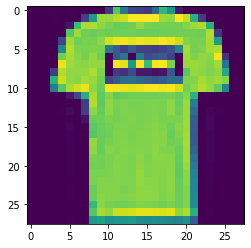

In [8]:
plt.imshow(x_train_full[1])

In [9]:
y_train_full[1]

0

In [10]:
class_names=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [11]:
class_names[y_train_full[1]]

'T-shirt/Top'

In [12]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Data Normalisation
### we then normalise the data dimensions so that they are of approximately the same slide

In [13]:
x_train_n=x_train_full/255.0
x_test_n=x_test/255.0

### split the data into train/validation/test datasets

In the earlier step of importing the data, we had 60,000 datasetsfor traing and 10,000 for testing. Now we further split it in train/validation. Here is how each type of dataset is used in deep learning.

##### Traing data - used for training the model
##### Validation data - used for tuning the hyperparameters and evaluate the models
##### Test data - used to test the model after the model has gone through initial vetting by the validation set

In [14]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test= x_test_n

In [15]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# ANN part 1

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


##### we can access the parameters using get_weight() method

In [22]:
weights, biases = model.layers[1].get_weights()

In [23]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

#### compiling and traing the ANN

In [27]:
model.compile( loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [28]:
model_history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5211 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4842 - accuracy: 0.8321 - val_loss: 0.4352 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4388 - accuracy: 0.8455 - val_loss: 0.5341 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4121 - accuracy: 0.8565 - val_loss: 0.3916 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3937 - accuracy: 0.8619 - val_loss: 0.3747 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3751 - accuracy: 0.8675 - val_loss: 0.3712 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3631 - accuracy: 0.8714 - val_loss: 0.3626 - val_accuracy

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
model_history.history

{'loss': [0.7238963842391968,
  0.4841609597206116,
  0.4388359487056732,
  0.41210880875587463,
  0.3936830163002014,
  0.3750554025173187,
  0.36307492852211,
  0.35167768597602844,
  0.34122443199157715,
  0.3319668471813202,
  0.3239501118659973,
  0.314779132604599,
  0.3079925775527954,
  0.3020594120025635,
  0.2946440577507019,
  0.2888789474964142,
  0.2839704155921936,
  0.2777304947376251,
  0.27290913462638855,
  0.26735952496528625,
  0.2625105679035187,
  0.2577986717224121,
  0.2536044120788574,
  0.2486632764339447,
  0.24438659846782684,
  0.240587055683136,
  0.2365162968635559,
  0.2327929139137268,
  0.22858819365501404,
  0.22532610595226288],
 'accuracy': [0.7642727494239807,
  0.8321454524993896,
  0.8454545736312866,
  0.8565090894699097,
  0.8619454503059387,
  0.8674908876419067,
  0.871399998664856,
  0.875072717666626,
  0.8791818022727966,
  0.8824545741081238,
  0.8841454386711121,
  0.8865636587142944,
  0.8894727230072021,
  0.8915272951126099,
  0.89372

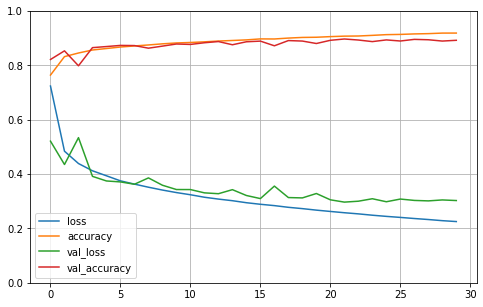

In [31]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Evaluating performance and predicting classes

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3353 - accuracy: 0.8821


[0.33530178666114807, 0.882099986076355]

In [33]:
x_new = x_test[:3]

In [34]:
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [35]:
y_prob = model.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 1s 1s/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(x_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [38]:
np.array(class_names)[y_pred]

NameError: name 'y_pred' is not defined

AxesImage(54,36;334.8x217.44)


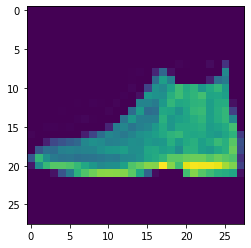

In [40]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


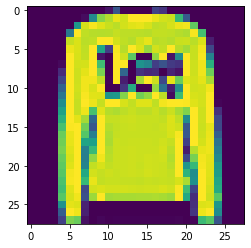

In [41]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


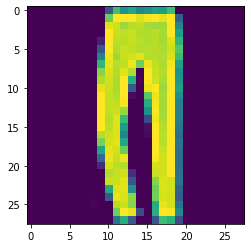

In [42]:
print(plt.imshow(x_test[2]))